# Roof mobiliaria - Condado de King - Washington

# Entendimento de negócio

## Qual a minha meta?

Elaborar um ranking do melhor ao pior imóvel para investimento e informar à empresa os TOP 5 (melhores e piores).

## Como posso chegar?

Usar analise estatatistica descritiva na base de dados dos imóveis do condado de King para, através da apresentação gráfica das análises, ajudar o cliente à definir os 5 melhores e os 5 pióres negócios.

## Contexto:

**Empresas do ramo imobiliário Brasileiro quer expandir sua área de atuação fazendo um investimento internacional no Condado de County, nos Estados Unidos.**

* O Condado de King é um dos 39 condados do estado americano de Washington.
* A sede e cidade mais populosa do condado é Seattle.
* Foi fundado em 1852.
* Possui mais de 2,2 milhões de habitantes.
* De acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país.

# Compreensão dos dados

## Imports

In [254]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [400]:
import numpy as np
import pandas as pd
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import interact
import folium

## Carregamento dos dados

In [256]:
# Carregando dataset de vendas
df_vendas = pd.read_csv('/content/dataset_vendas.csv')
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [257]:
df_vendas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [258]:
# Carregando dataset de cidades
df_cidades = pd.read_csv('/content/dataset_cidades.csv')

df_cidades.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,147643.355747,5.253133e+08
1,2,98002,98002,33,Standard,King County,AUBURN,104440.086791,2.053028e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,123619.720418,3.169395e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,109051.119162,2.017598e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116554.737369,2.114337e+08


## Unificando datasets

In [259]:
# padronizando nomes das colunas e eliminando duplicados para o join dos dados
df_cidades.columns = df_cidades.columns.str.lower()
df_cidades = df_cidades[df_cidades["county_name"] =="King County"]
df_cidades = df_cidades[["zipcode", "preferred_city"]]
# value_counts = df_cidades.zipcode.value_counts() > 1
# value_counts.value_counts()
# df_cidades[df_cidades.zipcode.isin(value_counts.index)]
# df_cidades.drop_duplicates(subset='zipcode', keep='first', inplace=True)
df_cidades

,zipcode,preferred_city
0,98001,AUBURN
1,98002,AUBURN
2,98003,FEDERAL WAY
3,98004,BELLEVUE
4,98005,BELLEVUE
...,...,...
100,98199,SEATTLE
108,98224,BARING
118,98288,SKYKOMISH
147,98354,MILTON


In [260]:
df_vendas = df_vendas.merge(df_cidades, on = "zipcode", how = "left")
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21613 non-null  int64  
 1   date            21613 non-null  object 
 2   price           21613 non-null  float64
 3   bedrooms        21613 non-null  int64  
 4   bathrooms       21613 non-null  float64
 5   sqft_living     21613 non-null  int64  
 6   sqft_lot        21613 non-null  int64  
 7   floors          21613 non-null  float64
 8   waterfront      21613 non-null  int64  
 9   view            21613 non-null  int64  
 10  condition       21613 non-null  int64  
 11  grade           21613 non-null  int64  
 12  sqft_above      21613 non-null  int64  
 13  sqft_basement   21613 non-null  int64  
 14  yr_built        21613 non-null  int64  
 15  yr_renovated    21613 non-null  int64  
 16  zipcode         21613 non-null  int64  
 17  lat             21613 non-null 

# Preparação dos dados

## Ajustando coluna de data

In [261]:
df_vendas.date = pd.to_datetime(df_vendas['date'], format='%Y/%m/%d')
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  float64       
 5   sqft_living     21613 non-null  int64         
 6   sqft_lot        21613 non-null  int64         
 7   floors          21613 non-null  float64       
 8   waterfront      21613 non-null  int64         
 9   view            21613 non-null  int64         
 10  condition       21613 non-null  int64         
 11  grade           21613 non-null  int64         
 12  sqft_above      21613 non-null  int64         
 13  sqft_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  int64         
 15  yr

## Ajustando colunas com medidas

In [262]:
convertion_factor = 0.092903
df_vendas["m2_living"] = np.round(df_vendas.sqft_living * convertion_factor, 2)
df_vendas["m2_lot"] = np.round(df_vendas.sqft_lot * convertion_factor, 2)
df_vendas["m2_above"] = np.round(df_vendas.sqft_above * convertion_factor, 2)
df_vendas["m2_basement"] = np.round(df_vendas.sqft_basement * convertion_factor, 2)
df_vendas["m2_living15"] = np.round(df_vendas.sqft_living15 * convertion_factor, 2)
df_vendas["m2_lot15"] = np.round(df_vendas.sqft_lot15 * convertion_factor, 2)
df_vendas.drop(labels=["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"], axis=1, inplace=True)
df_vendas.describe()

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.00000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,193.228957,1403.482626,166.146854,27.082014,184.556687,1186.22781
std,2.876566e+09,3.671272e+05,0.930062,0.770163,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,85.325930,3848.089750,76.932193,41.116450,63.674934,2536.64017
min,1.000102e+06,7.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,26.940000,48.310000,26.940000,0.000000,37.070000,60.48000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,132.570000,468.230000,110.550000,0.000000,138.430000,473.81000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,177.440000,707.740000,144.930000,0.000000,170.940000,707.92000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,236.900000,992.950000,205.320000,52.030000,219.250000,936.74000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,1257.910000,153416.210000,874.220000,447.790000,576.930000,80937.09000


## Ajustando colunas categóricas

In [263]:
categoric_cols = ["id","waterfront","view","condition","grade","yr_built","yr_renovated","zipcode","preferred_city"]
df_vendas[categoric_cols] = df_vendas[categoric_cols].astype('category')
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  category      
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  float64       
 5   floors          21613 non-null  float64       
 6   waterfront      21613 non-null  category      
 7   view            21613 non-null  category      
 8   condition       21613 non-null  category      
 9   grade           21613 non-null  category      
 10  yr_built        21613 non-null  category      
 11  yr_renovated    21613 non-null  category      
 12  zipcode         21613 non-null  category      
 13  lat             21613 non-null  float64       
 14  long            21613 non-null  float64       
 15  pr

# Qualidade dos dados

## Configurações gráficas

In [317]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (25,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

## Validando nulos

In [264]:
df_vendas.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
floors            0
waterfront        0
view              0
condition         0
grade             0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
preferred_city    0
m2_living         0
m2_lot            0
m2_above          0
m2_basement       0
m2_living15       0
m2_lot15          0
dtype: int64

## Validando duplicados

In [265]:
value_counts = df_vendas.id.value_counts()

# Alguns imóveis foram vendidos mais de uma vez
df_revendas = df_vendas[df_vendas.id.isin(value_counts[value_counts > 1].index)]

# Mas nenhum consta com a mesma data, então podem ser considerados como vendas diferentes
value_counts = df_revendas[["id","date"]].value_counts()
value_counts.value_counts()

1    353
dtype: int64

## Validação de dados numéricos

In [266]:
df_vendas.select_dtypes('number').describe()

,price,bedrooms,bathrooms,floors,lat,long,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.00000
mean,5.400881e+05,3.370842,2.114757,1.494309,47.560053,-122.213896,193.228957,1403.482626,166.146854,27.082014,184.556687,1186.22781
std,3.671272e+05,0.930062,0.770163,0.539989,0.138564,0.140828,85.325930,3848.089750,76.932193,41.116450,63.674934,2536.64017
min,7.500000e+04,0.000000,0.000000,1.000000,47.155900,-122.519000,26.940000,48.310000,26.940000,0.000000,37.070000,60.48000
25%,3.219500e+05,3.000000,1.750000,1.000000,47.471000,-122.328000,132.570000,468.230000,110.550000,0.000000,138.430000,473.81000
50%,4.500000e+05,3.000000,2.250000,1.500000,47.571800,-122.230000,177.440000,707.740000,144.930000,0.000000,170.940000,707.92000
75%,6.450000e+05,4.000000,2.500000,2.000000,47.678000,-122.125000,236.900000,992.950000,205.320000,52.030000,219.250000,936.74000
max,7.700000e+06,33.000000,8.000000,3.500000,47.777600,-121.315000,1257.910000,153416.210000,874.220000,447.790000,576.930000,80937.09000


#### Avaliando preço

In [267]:
# O preço varia de $75.000,00 à $7.700.000,00
# Não parece haver nenhum problema com os dados
df_vendas.sort_values("price")

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,zipcode,lat,long,preferred_city,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
1149,3421079032,2015-02-17,75000.0,1,0.00,1.0,0,0,3,3,...,98022,47.2638,-121.906,ENUMCLAW,62.25,4029.85,62.25,0.00,107.77,3983.87
15293,40000362,2014-05-06,78000.0,2,1.00,1.0,0,0,1,5,...,98168,47.4739,-122.280,SEATTLE,72.46,1518.41,72.46,0.00,157.94,964.98
465,8658300340,2014-05-23,80000.0,1,0.75,1.0,0,0,2,4,...,98014,47.6499,-121.909,CARNATION,39.95,469.16,39.95,0.00,111.48,696.77
16198,3028200080,2015-03-24,81000.0,2,1.00,1.0,0,0,1,5,...,98168,47.4808,-122.315,SEATTLE,67.82,926.71,67.82,0.00,79.90,836.13
8274,3883800011,2014-11-05,82000.0,3,1.00,1.0,0,0,3,6,...,98146,47.4987,-122.341,SEATTLE,79.90,968.61,79.90,0.00,105.91,1045.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,2015-04-13,5350000.0,5,5.00,2.0,0,4,3,12,...,98004,47.6232,-122.220,BELLEVUE,743.22,2228.28,624.31,118.92,427.35,2020.64
4411,2470100110,2014-08-04,5570000.0,5,5.75,2.0,0,0,3,13,...,98039,47.6289,-122.233,MEDINA,854.71,3258.02,576.00,278.71,330.73,2261.72
9254,9208900037,2014-09-19,6885000.0,6,7.75,2.0,0,4,3,13,...,98039,47.6305,-122.240,MEDINA,918.81,2914.74,823.12,95.69,421.78,3969.75
3914,9808700762,2014-06-11,7062500.0,5,4.50,2.0,1,2,3,11,...,98004,47.6500,-122.214,BELLEVUE,932.75,3467.60,713.50,219.25,365.11,2364.29


#### Avaliando quantidade de quartos

In [268]:
# Avaliando a frequencia dos dados
df_vendas.bedrooms.value_counts().sort_index()

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [269]:
# Reservando outliers de quartos
df_outliers = df_vendas.loc[(df_vendas.bedrooms < 1) | (df_vendas.bedrooms >= 12)]

# Removendo outlier com 33 quartos
df_vendas = df_vendas[df_vendas.bedrooms < 12]

# Removendo outliers com 0 quartos
df_vendas = df_vendas[df_vendas.bedrooms > 0]

df_outliers = df_outliers.drop_duplicates()

In [270]:
df_vendas.bedrooms.value_counts().sort_index()

1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### Avaliando quantidade de banheiros

In [271]:
# Avaliando a frequencia dos dados
df_vendas.bathrooms.value_counts().sort_index()

0.00       3
0.50       4
0.75      71
1.00    3851
1.25       9
1.50    1445
1.75    3047
2.00    1930
2.25    2047
2.50    5377
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

In [272]:
# Removendo imóveis sem nenhum banheiro
df_outliers = df_outliers.append(df_vendas[df_vendas["bathrooms"] == 0])
df_vendas = df_vendas[df_vendas.bathrooms > 0]
df_outliers = df_outliers.drop_duplicates()
df_vendas.bathrooms.value_counts().sort_index()

0.50       4
0.75      71
1.00    3851
1.25       9
1.50    1445
1.75    3047
2.00    1930
2.25    2047
2.50    5377
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

### Avaliando pisos e sobrepisos

In [273]:
# Avaliando a frequencia dos dados
df_vendas.floors.value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

## Validação de dados categóricos

In [275]:
df_vendas.select_dtypes('category').describe()

,id,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,preferred_city
count,21596,21596,21596,21596,21596,21596,21596,21596,21596
unique,21419,2,5,5,11,116,70,70,25
top,795000620,0,0,3,7,2014,0,98103,SEATTLE
freq,3,21433,19474,14020,8973,559,20682,601,8972


### Avaliando imóveis com visão par ao mar

In [282]:
# validação das categorias de visão para o mar
df_vendas.waterfront.value_counts().sort_index()

0    21433
1      163
Name: waterfront, dtype: int64

### Avaliando imóveis pela qualidade da vista

In [281]:
# validação das categorias de avaliação da vista
df_vendas.view.value_counts().sort_index()

0    19474
1      332
2      961
3      510
4      319
Name: view, dtype: int64

### Avaliando imóveis pelo grau de qualidade

In [283]:
# validação das categorias de grau de qualidade do imóvel
df_vendas.grade.value_counts().sort_index()

1        0
3        1
4       27
5      242
6     2038
7     8973
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64

### Avaliando imóveis pelo ano de construção

In [305]:
# validação ano de construção do imóvel
df_vendas.yr_built.value_counts(normalize=True).sort_values(ascending=False)

2014    0.025884
2006    0.020976
2005    0.020837
2004    0.020050
2003    0.019448
          ...   
1933    0.001389
1901    0.001343
1902    0.001250
1935    0.001111
1934    0.000972
Name: yr_built, Length: 116, dtype: float64

<AxesSubplot:>

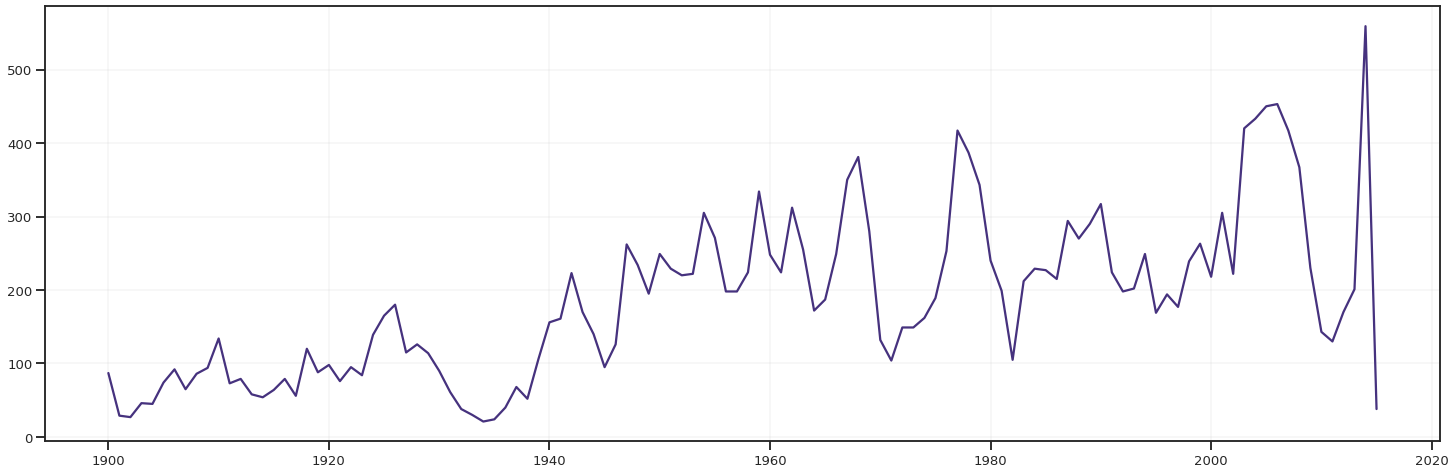

In [322]:
# validação ano de construção do imóvel
df_aux = df_vendas.yr_built.value_counts().sort_index()
sns.lineplot(x=df_aux.index, y=df_aux.values)

### Avaliando imóveis pelo ano da última reforma

In [323]:
# validação ano de reforma do imóvel
df_vendas.yr_renovated.value_counts(normalize=True).sort_values(ascending=False)

0       0.957677
2014    0.004214
2013    0.001713
2003    0.001667
2007    0.001621
          ...   
1951    0.000046
1959    0.000046
1934    0.000046
1944    0.000046
1954    0.000046
Name: yr_renovated, Length: 70, dtype: float64

<AxesSubplot:xlabel='yr_renovated', ylabel='id'>

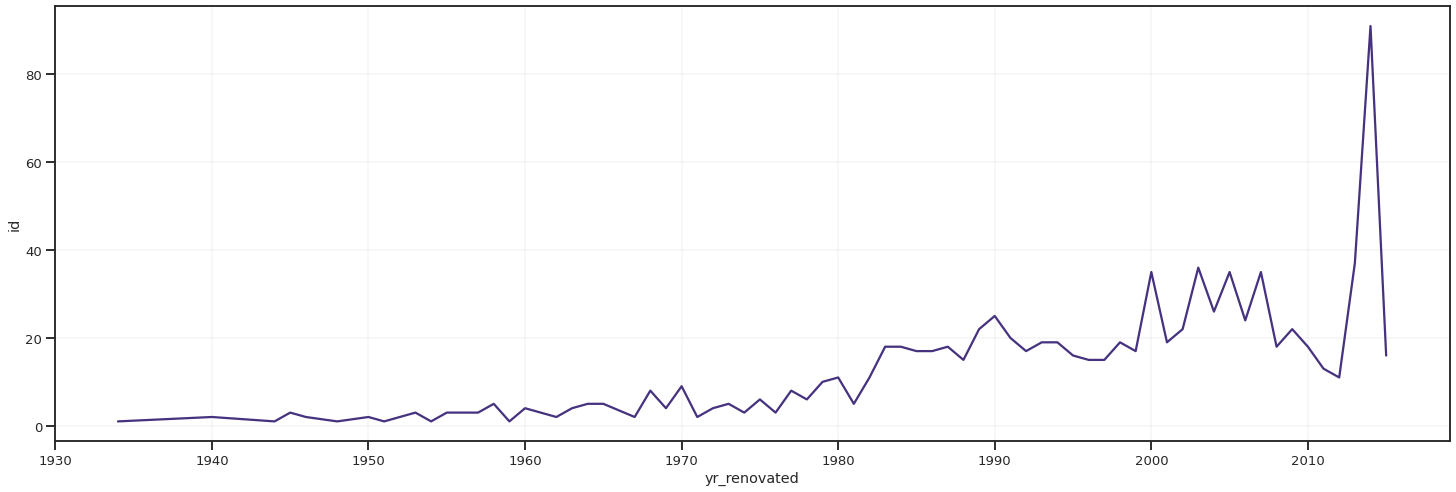

In [396]:
# validação ano de reforma do imóvel
df_aux = df_vendas[df_vendas["yr_renovated"].astype(int) > 0]
df_grouped = df_aux.groupby('yr_renovated')['id'].count().reset_index()
df_grouped = df_grouped[df_grouped["id"]>0]

sns.lineplot(x=df_grouped.yr_renovated, y=df_grouped.id)

### Avaliando imóveis pela cidade

In [399]:
df_grouped = df_vendas.groupby('preferred_city')['id'].count().reset_index().sort_values(by='id', ascending=False)
df_grouped

,preferred_city,id
21,SEATTLE,8972
18,RENTON,1597
1,BELLEVUE,1407
11,KENT,1201
12,KIRKLAND,977
17,REDMOND,977
0,AUBURN,911
8,FEDERAL WAY,779
9,ISSAQUAH,733
13,MAPLE VALLEY,589


# Análise dos dados

## Analises univariada